In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import spacy
from collections import Counter
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary, MmCorpus
from gensim.models import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
nlp = spacy.load("en_core_web_sm")

C:\Users\JeSeok\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\JeSeok\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\JeSeok\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible 

In [2]:
smartphone_review = pd.read_csv('smartphone.csv', encoding = 'utf-8-sig')

In [47]:
wc = WordCloud()

In [3]:
smartphone_review.head()

,Product_nm,Rating,Title,Body,Product_cd,Brand
0,삼성 갤럭시 S21 플러스 5G SM-G996B/DS 256GB 8GB RAM 인터...,5.0,Esta hermoso pero no fue compatible con mi ope...,Esta hermoso pero no fue compatible con mi ope...,B08QXW1TXX,Samsung
1,삼성 갤럭시 S21 플러스 5G SM-G996B/DS 256GB 8GB RAM 인터...,1.0,FALSE ADVERTISEMENT,"The phone was advertised as....""This phone wil...",B08QXW1TXX,Samsung
2,삼성 갤럭시 S21 플러스 5G SM-G996B/DS 256GB 8GB RAM 인터...,4.0,"""B"" version - not compatible with AT&T",Did not have a chance to use it. Not working w...,B08QXW1TXX,Samsung
3,삼성 갤럭시 S21 플러스 5G SM-G996B/DS 256GB 8GB RAM 인터...,5.0,"So happy with the phone, as good as I expected...","I bought this for my girl, an she is so happy ...",B08QXW1TXX,Samsung
4,삼성 갤럭시 S21 플러스 5G SM-G996B/DS 256GB 8GB RAM 인터...,1.0,"This ""International"" Version is not covered by...","After 5 months, the defective screen just stop...",B08QXW1TXX,Samsung


In [4]:
len(smartphone_review)

105637

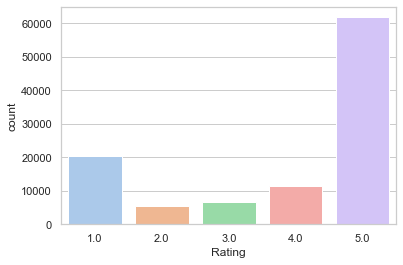

In [5]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(data=smartphone_review, x="Rating")
plt.show()

In [6]:
# 리뷰 글자수
smartphone_review['Body'].dropna().map(len)

0           51
1          561
2          218
3          155
4          163
          ... 
105632      17
105633      21
105634      38
105635    2014
105636    5009
Name: Body, Length: 105535, dtype: int64

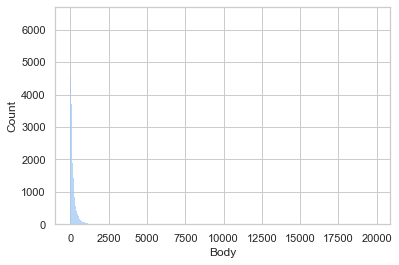

In [7]:
# 리뷰 길이 분포 (글자수)
sns.histplot(smartphone_review['Body'].dropna().map(len))
plt.show()

In [8]:
# 가장 긴 리뷰 글자수
smartphone_review['Body'].dropna().map(len).max()

19875

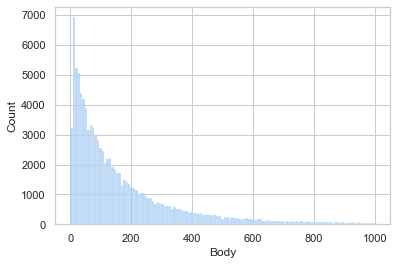

In [9]:
# 리뷰 글자수 분포 (1000 글자 이하)
review_chars = smartphone_review['Body'].dropna().map(len)
sns.histplot(review_chars[review_chars < 1000])
plt.show()

In [10]:
# 리뷰 단어수
smartphone_review['Body'].dropna().map(lambda x: len(x.split()))

0           9
1         105
2          40
3          33
4          28
         ... 
105632      4
105633      5
105634      8
105635    346
105636    922
Name: Body, Length: 105535, dtype: int64

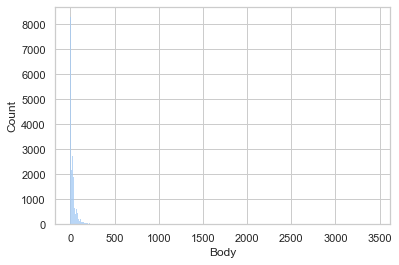

In [11]:
# 리뷰 길이 분포 (단어수)
sns.histplot(smartphone_review['Body'].dropna().map(lambda x: len(x.split())))
plt.show()

In [12]:
# 가장 긴 리뷰의 단어수
smartphone_review['Body'].dropna().map(lambda x: len(x.split())).max()

3446

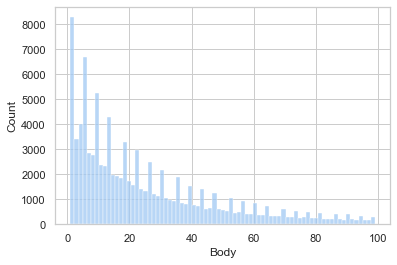

In [13]:
# 리뷰 단어수 분포 (100 단어 이하)
review_words = smartphone_review['Body'].dropna().map(lambda x: len(x.split()))
sns.histplot(review_words[review_words < 100])
plt.show()

In [14]:
# 갤럭시폰과 아이폰 평점 비교
# 아이폰 평균 평점
smartphone_review[smartphone_review["Brand"] == "Apple"]["Rating"].mean()

3.8079804516527482

In [15]:
# 갤럭시폰 평균 평점
smartphone_review[smartphone_review["Brand"] == "Samsung"]["Rating"].mean()

3.8641002397801043

In [16]:
def clean_reviews(df):
    reviews = ' '.join(df['Body'])
    reviews_lower = reviews.lower() # 소문자로
    reviews_tokens = nltk.word_tokenize(reviews_lower) # 토큰화
    reviews_tokens_clean = [token for token in reviews_tokens if token not in stopwords.words('english')] # 불용어 제거
    return reviews_tokens_clean

def draw_word_cloud(df):
    reviews_tokens_clean = clean_reviews(df)
    reviews_wc = wc.generate(' '.join(reviews_tokens_clean))
    return reviews_wc

In [17]:
# 리뷰를 모두 문자형으로 변경
for i in range(len(smartphone_review['Body'])):
    if type(smartphone_review['Body'][i]) != str:
        smartphone_review['Body'][i] = str(smartphone_review['Body'][i])
    else : pass

C:\Users\JeSeok\AppData\Local\Temp/ipykernel_22696/1684053809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphone_review['Body'][i] = str(smartphone_review['Body'][i])


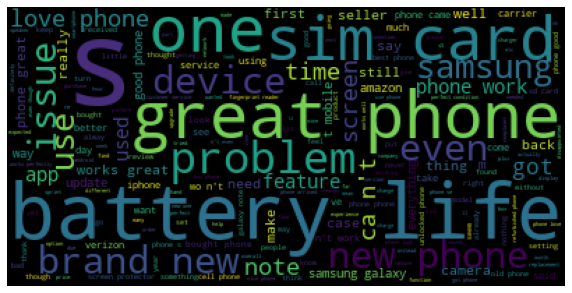

In [58]:
# 갤럭시폰 워드 클라우드
samsung_review = smartphone_review[lambda x: x['Brand'] == 'Samsung']
samsung_reviews_wc = draw_word_cloud(samsung_review)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(samsung_reviews_wc)
plt.show()

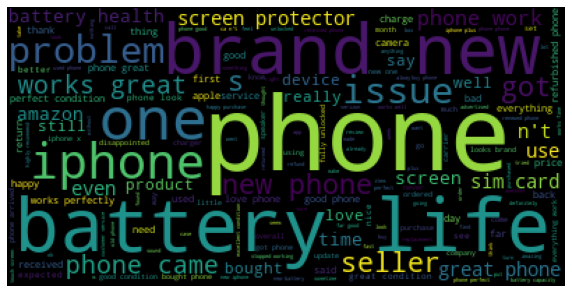

In [59]:
# 아이폰 워드 클라우드
apple_review = smartphone_review[lambda x: x['Brand'] == 'Apple']
apple_reviews_wc = draw_word_cloud(apple_review)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(apple_reviews_wc)
plt.show()

**위 워드 클라우드 만으로는 아이폰과 갤럭시폰의 차이를 알 수 없다.**

### TF-IDF

**리뷰 텍스트 전처리**

In [19]:
tokens_normalized = []
for doc in tqdm(nlp.pipe(smartphone_review['Body'].str.lower())):
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space] # 문장 부호와 공백 제거
    tokens_normalized.append(lemmas)

105637it [22:05, 79.72it/s] 


**Phrase modeling (bigram & trigram)**

In [20]:
bigram_model = Phrases(tokens_normalized)
bigram_phraser = Phraser(bigram_model)

In [21]:
tokens_bigram = []
for s in tokens_normalized:
    bigram_phrases = bigram_phraser[s]
    tokens_bigram.append(bigram_phrases)

In [22]:
trigram_model = Phrases(tokens_bigram)
trigram_phraser = Phraser(trigram_model)

In [23]:
tokens_trigram = []
for s in tokens_bigram:
    trigram_phrases = trigram_phraser[s]
    trigram_phrases = [token for token in trigram_phrases if token not in nlp.Defaults.stop_words and token != '-PRON-'] # -PRON-으로 바뀌는 대명사 제거
    tokens_trigram.append(trigram_phrases)

In [24]:
preprocessed_sentences = []
for s in tokens_trigram:
    preprocessed_sentences.append(' '.join(s))

In [25]:
smartphone_review['Reviews Preprocessed'] = preprocessed_sentences

**분석 대상 단어 선정**

전체 리뷰 내용 중 불용어를 제외하고 일정 수 이상 출현한 단어만을 분석 대상 단어로 정함

In [26]:
full_counter = Counter([token for s in tokens_trigram for token in s])
target_words = [key for key, value in full_counter.most_common(500)] # 분석 대상 : 상위 500개의 단어

In [27]:
target_words[-10:]

['s3',
 '5_g',
 'build',
 'audio',
 'notification',
 'guy',
 's6',
 'extremely',
 'iphone_6',
 'work_properly']

**TF-IDF 계산**

분석 대상 단어에 대해 TF-IDF 점수를 계산

In [28]:
def tf(word, document):
    return document[word] / sum(document.values())

def idf(word, corpus):
    num_containing = sum(1 for document in corpus if document[word] > 0)
    return len(corpus) / (1 + num_containing)

In [29]:
counters = []
for s in tokens_trigram:
    review_counter = Counter(s)
    counters.append(review_counter)

target_words_idf = {target_word: idf(target_word, counters) for target_word in target_words}

In [30]:
def tfidf(word, document, corpus):
    return tf(word, document) * target_words_idf[word]

def tfidf_scores(document, others):
    scores = {}
    for word in target_words:
        if word not in document:
            score = 0
        else:
            score = tfidf(word, document, others)
        scores[word] = score
    return scores

In [32]:
# 타겟 문서들과 비교 문서들의 단어 빈도를 비교해서 타겟 문서의 평균 TF-IDF를 구한다.
def average_tfidf(documents, other_documents):
    corpus = []
    for other_document in other_documents:
        corpus.append(Counter(other_document.split()))

    document_scores = []
    for document in documents:
        document_counter = Counter(document.split())
        document_scores.append(tfidf_scores(document_counter, corpus))

    average_scores = {}
    for document_score in document_scores:
        for token, score in document_score.items():
            average_scores[token] = average_scores.get(token, 0) + score

    average_scores = {token: score / len(documents) for token, score in average_scores.items()}
    return average_scores

In [33]:
# 갤럭시폰 리뷰 TF-IDF
df_samsung = smartphone_review[lambda x: x['Brand'] == 'Samsung']
scores_samsung = average_tfidf(df_samsung['Reviews Preprocessed'], smartphone_review['Reviews Preprocessed'])
scores_samsung_sorted = sorted(scores_samsung.items(), key=lambda x:x[1], reverse=True)
scores_samsung_sorted[:20]

[('excelente', 0.5469611528258437),
 ('excellent', 0.23985473342750735),
 ('love', 0.21563150199645265),
 ('ok', 0.20367554487949585),
 ('as_describe', 0.1975330975694935),
 ('awesome', 0.1862411013129231),
 ('good', 0.17493739796991353),
 ('nice', 0.17451554225097227),
 ('cellphone', 0.16258123273819275),
 ('as_advertise', 0.16008284383489382),
 ('great', 0.1581059533057184),
 ('perfect', 0.15748105484674704),
 ('phone', 0.156586866665429),
 ('wonderful', 0.1504657694705323),
 ('very_satisfied', 0.14327381374189982),
 ('thank', 0.14181366276351667),
 ('absolutely_love', 0.13760995689402064),
 ('cool', 0.13015223680454388),
 ('expectation', 0.12857106797956916),
 ('gift', 0.1282475673685836)]

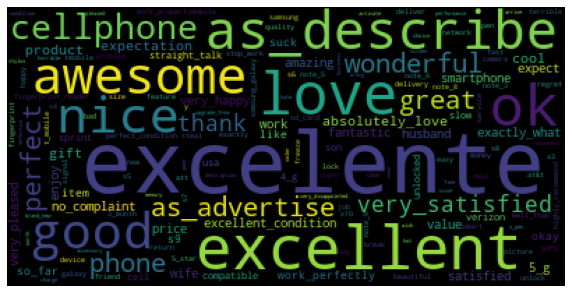

In [60]:
# 갤럭시폰 워드 클라우드
samsung_tfidf_wc = wc.generate_from_frequencies(scores_samsung)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(samsung_tfidf_wc)
plt.show()

In [34]:
# 아이폰 리뷰 TF-IDF
df_apple = smartphone_review[lambda x: x['Brand'] == 'Apple']
scores_apple = average_tfidf(df_apple['Reviews Preprocessed'], smartphone_review['Reviews Preprocessed'])
scores_apple_sorted = sorted(scores_apple.items(), key=lambda x:x[1], reverse=True)
scores_apple_sorted[:20]

[('excelente', 0.45033737129847606),
 ('’', 0.2586221141332791),
 ('daughter', 0.25575731216816516),
 ('excellent_condition', 0.23027492663400462),
 ('as_describe', 0.21873748049207134),
 ('perfect_condition', 0.21172432221788928),
 ('perfect', 0.20693600294266518),
 ('battery_health', 0.20038706465801168),
 ('gift', 0.1996045911703837),
 ('exactly_what', 0.1977030623865248),
 ('iphone_8', 0.19599527295490823),
 ('ok', 0.19484868861303345),
 ('work_perfectly', 0.18417106139797004),
 ('very_satisfied', 0.17951965307365278),
 ('iphone', 0.17645960273160236),
 ('son', 0.17506323251599318),
 ('good', 0.17482111774704281),
 ('iphone_7', 0.1728060480587074),
 ('thank', 0.17146565753084653),
 ('satisfied', 0.16453405408510763)]

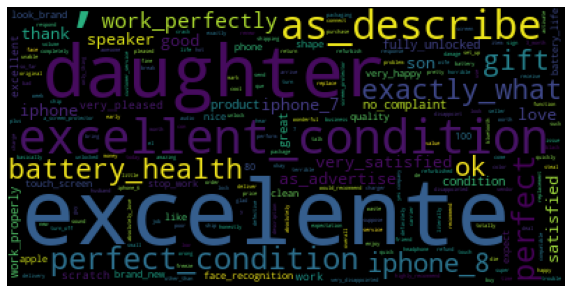

In [61]:
# 아이폰 워드 클라우드
apple_tfidf_wc = wc.generate_from_frequencies(scores_apple)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(apple_tfidf_wc)
plt.show()

좋은 리뷰들은 다 비슷하지만, 나쁜 리뷰에 더 관심이 있을 때가 많음

아마존 리뷰에서 갤럭시폰과 아이폰이 어떤 이유로 낮은 평가를 받는지 알아봄

In [35]:
# 갤럭시폰 리뷰 중 별점 3개 이하인 경우만 대상으로 TF-IDF를 구하고 워드 클라우드를 그려본다
df_samsung_bad = smartphone_review[lambda x: (x['Brand'] == 'Samsung') & (x['Rating'] <= 3)]
scores_samsung_bad = average_tfidf(df_samsung_bad['Reviews Preprocessed'], smartphone_review['Reviews Preprocessed'])
scores_samsung_bad_sorted = sorted(scores_samsung_bad.items(), key=lambda x:x[1], reverse=True)
scores_samsung_bad_sorted[:20]

[('suck', 0.26920813320677056),
 ('stop_work', 0.255039535597471),
 ('freeze', 0.24312764235576123),
 ('slow', 0.2397548992410081),
 ('compatible', 0.23712846653708528),
 ('lock', 0.23008467341324446),
 ('terrible', 0.21997564190042346),
 ('very_disappointed', 0.21965911134381474),
 ('defective', 0.21072036349436316),
 ('horrible', 0.20809378176820756),
 ('sprint', 0.20710657467250865),
 ('return', 0.20441396484809157),
 ('work_properly', 0.20254751477699082),
 ('4_g', 0.20250736867357108),
 ('unlocked', 0.20070461627410324),
 ('usa', 0.19862173749479517),
 ('waste', 0.19373884248771825),
 ('unlock', 0.1827310948966938),
 ('unable', 0.1824452539972883),
 ('verizon', 0.1778100798496842)]

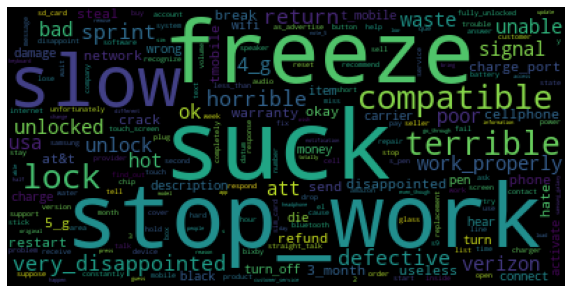

In [62]:
samsung_bad_tfidf_wc = wc.generate_from_frequencies(scores_samsung_bad)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(samsung_bad_tfidf_wc)
plt.show()

통신사, 4G, 개통 관련 문제를 제외한 기계적인 문제로만 본다면,

갤럭시폰은 멈춤, 결함, 느림, 호환 관련의 악평이 많았다.

In [36]:
# 아이폰 리뷰 중 별점 3개 이하인 경우만 대상으로 TF-IDF를 구하고 워드 클라우드를 그려본다
df_apple_bad = smartphone_review[lambda x: (x['Brand'] == 'Apple') & (x['Rating'] <= 3)]
scores_apple_bad = average_tfidf(df_apple_bad['Reviews Preprocessed'], smartphone_review['Reviews Preprocessed'])
scores_apple_bad_sorted = sorted(scores_apple_bad.items(), key=lambda x:x[1], reverse=True)
scores_apple_bad_sorted[:20]

[('stop_work', 0.38607444644117966),
 ('speaker', 0.3661189290506743),
 ('work_properly', 0.3484504868089084),
 ('defective', 0.3240593796729749),
 ('horrible', 0.3109651532416137),
 ('hear', 0.29615505128327535),
 ('very_disappointed', 0.2925246100905933),
 ('steal', 0.2868975352883354),
 ('fully_unlocked', 0.28589901141990376),
 ('refund', 0.27191186506675524),
 ('suck', 0.2628332285906591),
 ('terrible', 0.25637769683359446),
 ('volume', 0.24178454797954427),
 ('waste', 0.22834238531447137),
 ('80', 0.2277257087534181),
 ('return', 0.2227513325804),
 ('audio', 0.211832419277716),
 ('bad', 0.2116304446577928),
 ('break', 0.20415450285602046),
 ('sound', 0.20308021372131285)]

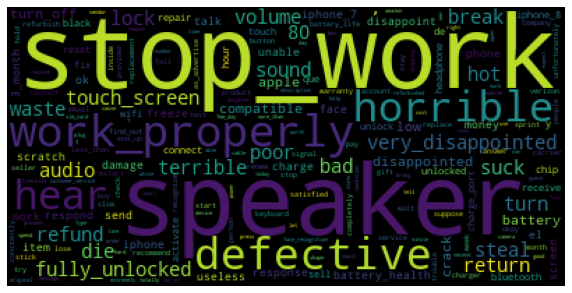

In [63]:
apple_bad_tfidf_wc = wc.generate_from_frequencies(scores_apple_bad)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(apple_bad_tfidf_wc)
plt.show()

아이폰 또한 멈춤, 결함과 관련된 리뷰가 많았다.

하지만, 갤럭시폰과 다르게 볼륨, 음질 관련 스피커 문제가 부각되었다.

# 토픽 모델링

In [38]:
dictionary = Dictionary(tokens_trigram)
dictionary.filter_extremes(no_below=10, no_above=0.4)
dictionary.compactify()

In [39]:
def make_bow_corpus(tokens):
    for review in tokens:
        yield dictionary.doc2bow(review)

corpus_filepath = 'corpus.mm'
MmCorpus.serialize(corpus_filepath, make_bow_corpus(tokens_trigram))
review_corpus = MmCorpus(corpus_filepath)

In [40]:
lda = LdaMulticore(review_corpus,
                    num_topics=20, #토픽수
                    id2word=dictionary,
                    workers=2)

In [48]:
# 인덱싱을 통해 할당된 토픽 확인
lda.show_topic(0)

[('come', 0.07274955),
 ('charger', 0.029529843),
 ('product', 0.019862665),
 ('brand_new', 0.019196583),
 ('new', 0.018677324),
 ('box', 0.018537173),
 ('like', 0.0179719),
 ('scratch', 0.016161503),
 ('purchase', 0.015915072),
 ('look', 0.01423067)]

In [42]:
ldavis = gensimvis.prepare(topic_model=lda, 
                           corpus=review_corpus, 
                           dictionary=dictionary)

C:\Users\JeSeok\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [43]:
# 각 인덱싱의 토픽 주제는 정해져 있지 않지만, 단어수로 유추 가능
pyLDAvis.display(ldavis)